Original Dataset Shape: (284807, 31)

Class Distribution (Full Dataset):
Class
0    284315
1       492
Name: count, dtype: int64

Test Set Class Distribution:
Class
0    85295
1      148
Name: count, dtype: int64

Oversampled Training Data Shape: (398040, 31)
Class Distribution (Oversampled Train):
Class
0    199020
1    199020
Name: count, dtype: int64


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



========= LOGISTIC REGRESSION MODEL EVALUATION =========
Accuracy : 0.9776
Precision: 0.0643
Recall   : 0.8784
F1 Score : 0.1198

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



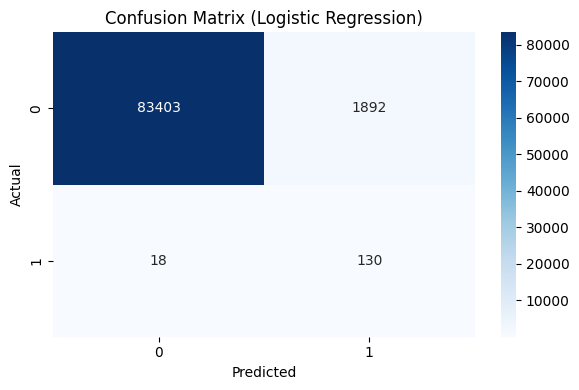

c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


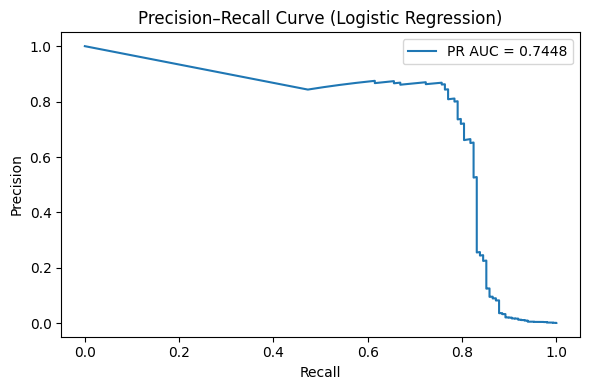


✅ Logistic Regression model saved as 'logistic_regression_model.pkl'
✅ Graphs saved: 'logreg_confusion_matrix.png', 'logreg_precision_recall_curve.png'


In [1]:
# logistic_regression_credit_card_fraud.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score,
    precision_recall_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# ========================================
# LOAD ORIGINAL DATA FOR TEST SET
# ========================================
df = pd.read_csv("creditcard.csv")
print("Original Dataset Shape:", df.shape)
print("\nClass Distribution (Full Dataset):")
print(df['Class'].value_counts())

X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_dummy, X_test, y_train_dummy, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

print("\nTest Set Class Distribution:")
print(y_test.value_counts())

# ========================================
# LOAD OVERSAMPLED TRAINING DATA (ALREADY SCALED)
# ========================================
train_df = pd.read_csv("oversampled_creditcard_data.csv")
print("\nOversampled Training Data Shape:", train_df.shape)
print("Class Distribution (Oversampled Train):")
print(train_df['Class'].value_counts())

X_train_res = train_df.drop('Class', axis=1)
y_train_res = train_df['Class']

# ========================================
# TRAIN LOGISTIC REGRESSION
# ========================================
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_res, y_train_res)

# ========================================
# EVALUATION
# ========================================
y_pred = log_reg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n========= LOGISTIC REGRESSION MODEL EVALUATION =========")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("logreg_confusion_matrix.png", dpi=300)
plt.show()

# Precision–Recall Curve
y_prob = log_reg.predict_proba(X_test)[:, 1]
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall_vals, precision_vals)

plt.figure(figsize=(6, 4))
plt.plot(recall_vals, precision_vals, label=f'PR AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve (Logistic Regression)')
plt.legend()
plt.tight_layout()
plt.savefig("logreg_precision_recall_curve.png", dpi=300)
plt.show()

# Save model
with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(log_reg, f)

print("\n✅ Logistic Regression model saved as 'logistic_regression_model.pkl'")
print("✅ Graphs saved: 'logreg_confusion_matrix.png', 'logreg_precision_recall_curve.png'")
